Practice Questions:
1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11482147]]), array([-6.00880515]))

Text(0, 0.5, 'household')

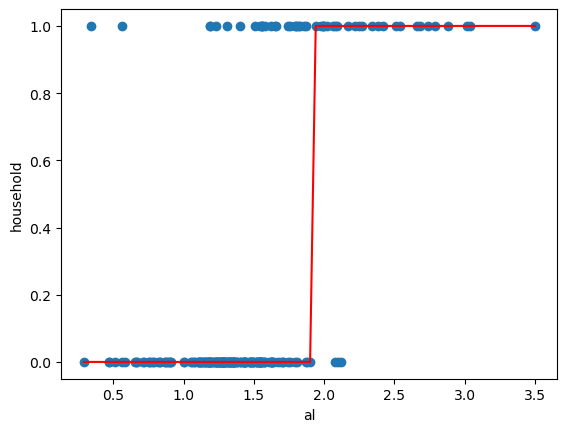

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_prob = logreg.predict_proba(X_test)[:, 1]

# Define a function to compute metrics based on custom threshold
def evaluate_threshold(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

# Evaluate default threshold (0.5)
accuracy_default, precision_default, recall_default = evaluate_threshold(y_test, y_prob)
print("Default Threshold (0.5)")
print(f"Accuracy: {accuracy_default:.4f}, Precision: {precision_default:.4f}, Recall: {recall_default:.4f}")

thresholds = [0.3, 0.4, 0.6, 0.7]
for threshold in thresholds:
    accuracy, precision, recall = evaluate_threshold(y_test, y_prob, threshold)
    print(f"Threshold: {threshold}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Default Threshold (0.5)
Accuracy: 0.8837, Precision: 0.8750, Recall: 0.6364
Threshold: 0.3, Accuracy: 0.8140, Precision: 0.6000, Recall: 0.8182
Threshold: 0.4, Accuracy: 0.8837, Precision: 0.7500, Recall: 0.8182
Threshold: 0.6, Accuracy: 0.8605, Precision: 0.8571, Recall: 0.5455
Threshold: 0.7, Accuracy: 0.8372, Precision: 1.0000, Recall: 0.3636


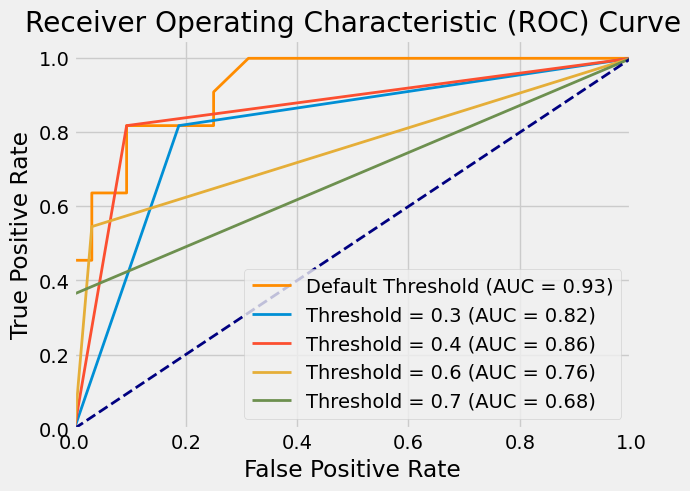

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each threshold
fpr_default, tpr_default, _ = roc_curve(y_test, y_prob)
roc_auc_default = auc(fpr_default, tpr_default)

plt.figure()
lw = 2
plt.plot(fpr_default, tpr_default, color='darkorange',
         lw=lw, label=f'Default Threshold (AUC = {roc_auc_default:.2f})')

# Try custom thresholds and compute ROC curves
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'Threshold = {threshold} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [7]:
logreg.predict_proba(X)[:15]

array([[0.99397328, 0.00602672],
       [0.99296478, 0.00703522],
       [0.98948976, 0.01051024],
       [0.98948976, 0.01051024],
       [0.98811176, 0.01188824],
       [0.98613609, 0.01386391],
       [0.98613609, 0.01386391],
       [0.98525808, 0.01474192],
       [0.98173207, 0.01826793],
       [0.98116498, 0.01883502],
       [0.98058065, 0.01941935],
       [0.97806048, 0.02193952],
       [0.97738205, 0.02261795],
       [0.97522152, 0.02477848],
       [0.97522152, 0.02477848]])

In [8]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006027
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007035
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010510
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011888
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935929
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950822
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967641
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969535


Text(0, 0.5, 'household')

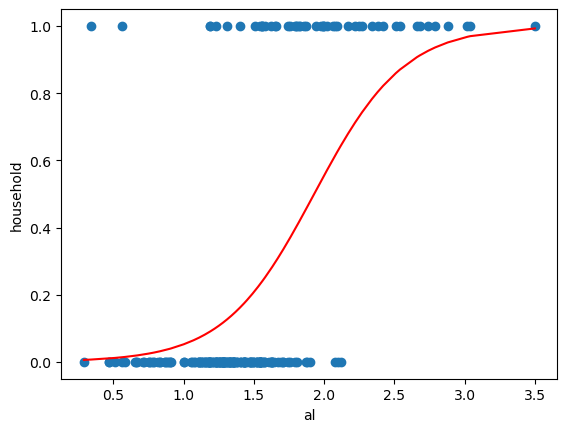

In [10]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [12]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [13]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [14]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [16]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [17]:
recall_score(y,pred)

0.5098039215686274